# INITIAL INVESTIGATION OF THE SENTIMENT ANALYSIS SIMILARITIES AND CONSISTENCIES IN ENGLISH AND CHINESE
Vladimir Nikonov

## 1. Importing the Data, Transformations, Preprocessing, Exploratory Data Analysis

In [1]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

import operator                               # for getting category having highest score

from deep_translator import GoogleTranslator  # library chosen for translating Chinese text into English

from spacy.tokens import DocBin               # spacy class for Doc binary serialization
import spacy

### 1.1 Importing the Dataset

In [2]:
# Reading data.
domains = ["Emotion", "Celebrities", "Finance", "Law", "Sports", 
              "Cinema", "Shows", "Campus", "Tourism", "TV_Dramas", 
              "Technology", "Health", "Games", "Military", "Digital", 
              "Constellations", "Fitness", "Comedy", "Animation", 
              "International", "Covid-19", "Government"]

domain_len = len(domains)

domain_range = range(domain_len)

dfs = []

for i in range(1, domain_len+1):
    temp_df = pd.read_excel("data/" + str(i) + "-" + domains[i-1] + ".xlsx")
    dfs.append(temp_df)


# Checking data.
dfs[12].head()

,序号,类别,话题,评论,情感属性
0,13-000001-0,游戏,如何评价OP为原神充值30万，想当游戏策划被拒之门外[doge],在医院花了100w为什么不让我下一场手术主刀,积极
1,13-000001-1,游戏,如何评价OP为原神充值30万，想当游戏策划被拒之门外[doge],请问你算什么东西？我花了几十万和十几二十年的青春读书，你弄三十万玩游戏就想和我一起工作，你算那根葱,消极
2,13-000001-2,游戏,如何评价OP为原神充值31万，想当游戏策划被拒之门外[doge],游戏厂商程序猿一年工资也比30w多太多了吧，为了30w就把啥也不会只有热爱的玩家招进来，那这...,积极
3,13-000001-3,游戏,如何评价OP为原神充值32万，想当游戏策划被拒之门外[doge],简单来说充钱并不代表是人上人,积极
4,13-000001-4,游戏,如何评价OP为原神充值33万，想当游戏策划被拒之门外[doge],用的图都是老图，饵咸钩直了属于是[二哈],消极


### 1.2 Data Transformations

In [3]:
# Renaming columns.
for i in domain_range:
    dfs[i].columns = ["No.", "Domain", "Topic", "Comment", "Label"]


# Checking column names.
dfs[13].columns

Index(['No.', 'Domain', 'Topic', 'Comment', 'Label'], dtype='object')

In [4]:
# Removing unnecessary columns No., Domain, Topic.
for i in domain_range:
    dfs[i] = dfs[i][["Comment", "Label"]]


# Checking random dataset.
dfs[14].head()

,Comment,Label
0,用不用的无所谓，支持的快充协议是pd就行,积极
1,这都不懂，库克只要留着这个，等🍎真的挤不出来那么多新功能，然后再用这个来做卖点，虽然我自己也...,消极
2,让电池更快老化，岂不是可以减少手机寿命，使新产品卖的更好,消极
3,库克咱猜不到的,中性
4,应该是想显示它的独特性吧,积极


### 1.3 Data Cleaning and Exploratory Data Analysis

In [5]:
# Checking info of each dataframe.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i]) 
    print(str(dfs[i].info()) + "\n")

1. Emotion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  11000 non-null  object
 1   Label    11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB
None

2. Celebrities
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  11000 non-null  object
 1   Label    11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB
None

3. Finance
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  11000 non-null  object
 1   Label    11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB
None

4. Law
<class 'pandas.core.frame.DataFrame'>
RangeI

The number of records in the dataframes ranges from 700 (Covid-19) to 12,000 (Tourism).

15 out of 22 dataframes have more than 10,000 records.

In [6]:
# Checking for null values.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i])
    print(str(dfs[i].isna().sum().sum()) + "\n")

1. Emotion
0

2. Celebrities
0

3. Finance
0

4. Law
0

5. Sports
0

6. Cinema
0

7. Shows
1

8. Campus
0

9. Tourism
0

10. TV_Dramas
0

11. Technology
0

12. Health
0

13. Games
0

14. Military
0

15. Digital
0

16. Constellations
0

17. Fitness
0

18. Comedy
5

19. Animation
8

20. International
0

21. Covid-19
0

22. Government
0



In [7]:
# Dropping rows with null values.
for i in domain_range:
    dfs[i] = dfs[i].dropna()


# Checking null values.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i])
    print(str(dfs[i].isna().sum().sum()) + "\n")

1. Emotion
0

2. Celebrities
0

3. Finance
0

4. Law
0

5. Sports
0

6. Cinema
0

7. Shows
0

8. Campus
0

9. Tourism
0

10. TV_Dramas
0

11. Technology
0

12. Health
0

13. Games
0

14. Military
0

15. Digital
0

16. Constellations
0

17. Fitness
0

18. Comedy
0

19. Animation
0

20. International
0

21. Covid-19
0

22. Government
0



In [8]:
# Checking Label column.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i]) 
    print(str(dfs[i]["Label"].value_counts()) + "\n")

1. Emotion
Label
中性    8719
积极    1566
消极     715
Name: count, dtype: int64

2. Celebrities
Label
积极    7135
中性    2181
消极    1684
Name: count, dtype: int64

3. Finance
Label
中性    4778
消极    3287
积极    2935
Name: count, dtype: int64

4. Law
Label
积极    5744
中性    2791
消极    2465
Name: count, dtype: int64

5. Sports
Label
积极    3239
中性    1986
消极    1655
Name: count, dtype: int64

6. Cinema
Label
积极    5454
消极    3855
中性    1691
Name: count, dtype: int64

7. Shows
Label
积极    5424
中性    3955
消极    1620
Name: count, dtype: int64

8. Campus
Label
消极    5897
中性    2897
积极    2206
Name: count, dtype: int64

9. Tourism
Label
积极    6734
中性    4957
消极     309
Name: count, dtype: int64

10. TV_Dramas
Label
积极    6451
消极    2735
中性    1634
Name: count, dtype: int64

11. Technology
Label
积极    1575
中性    1513
消极     942
Name: count, dtype: int64

12. Health
Label
积极    4773
消极    1587
中性     140
Name: count, dtype: int64

13. Games
Label
积极    4812
中性    3533
消极    2655
Name: count, dtype: int64

Labels in some dataframes have duplicates that need cleaning

In [9]:
# Cleaning duplicates with .strip().
for i in domain_range:
    dfs[i]["Label"] = dfs[i]["Label"].str.strip()


# Checking labels.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i])
    print(str(dfs[i]["Label"].value_counts()) + "\n")

1. Emotion
Label
中性    8719
积极    1566
消极     715
Name: count, dtype: int64

2. Celebrities
Label
积极    7135
中性    2181
消极    1684
Name: count, dtype: int64

3. Finance
Label
中性    4778
消极    3287
积极    2935
Name: count, dtype: int64

4. Law
Label
积极    5744
中性    2791
消极    2465
Name: count, dtype: int64

5. Sports
Label
积极    3239
中性    1986
消极    1655
Name: count, dtype: int64

6. Cinema
Label
积极    5454
消极    3855
中性    1691
Name: count, dtype: int64

7. Shows
Label
积极    5424
中性    3955
消极    1620
Name: count, dtype: int64

8. Campus
Label
消极    5897
中性    2897
积极    2206
Name: count, dtype: int64

9. Tourism
Label
积极    6734
中性    4957
消极     309
Name: count, dtype: int64

10. TV_Dramas
Label
积极    6451
消极    2735
中性    1634
Name: count, dtype: int64

11. Technology
Label
积极    1575
中性    1513
消极     942
Name: count, dtype: int64

12. Health
Label
积极    4773
消极    1587
中性     140
Name: count, dtype: int64

13. Games
Label
积极    4812
中性    3533
消极    2655
Name: count, dtype: int64

There are no more label duplicates in any dataframes.
Labels can be renamed to English

In [10]:
# Renaming labels to POSITIVE, NEUTRAL and NEGATIVE.
for i in domain_range:
    dfs[i]["Label"] = dfs[i]["Label"].apply(lambda label: 
                                            'POSITIVE' if label=='积极'
                                            else ('NEUTRAL' if label=='中性' 
                                                  else 'NEGATIVE'))


# Checking labels.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i])
    print(str(dfs[i]["Label"].value_counts()) + "\n")

1. Emotion
Label
NEUTRAL     8719
POSITIVE    1566
NEGATIVE     715
Name: count, dtype: int64

2. Celebrities
Label
POSITIVE    7135
NEUTRAL     2181
NEGATIVE    1684
Name: count, dtype: int64

3. Finance
Label
NEUTRAL     4778
NEGATIVE    3287
POSITIVE    2935
Name: count, dtype: int64

4. Law
Label
POSITIVE    5744
NEUTRAL     2791
NEGATIVE    2465
Name: count, dtype: int64

5. Sports
Label
POSITIVE    3239
NEUTRAL     1986
NEGATIVE    1655
Name: count, dtype: int64

6. Cinema
Label
POSITIVE    5454
NEGATIVE    3855
NEUTRAL     1691
Name: count, dtype: int64

7. Shows
Label
POSITIVE    5424
NEUTRAL     3955
NEGATIVE    1620
Name: count, dtype: int64

8. Campus
Label
NEGATIVE    5897
NEUTRAL     2897
POSITIVE    2206
Name: count, dtype: int64

9. Tourism
Label
POSITIVE    6734
NEUTRAL     4957
NEGATIVE     309
Name: count, dtype: int64

10. TV_Dramas
Label
POSITIVE    6451
NEGATIVE    2735
NEUTRAL     1634
Name: count, dtype: int64

11. Technology
Label
POSITIVE    1575
NEUTRAL     15

SpaCy's TextCategorizer accepts strings as inputs, and some of the comments can be numeric.

In [11]:
# Making sure every comment is a string.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i])
    print(str(dfs[i]["Comment"].map(type).value_counts()) + "\n")

1. Emotion
Comment
<class 'str'>    11000
Name: count, dtype: int64

2. Celebrities
Comment
<class 'str'>    11000
Name: count, dtype: int64

3. Finance
Comment
<class 'str'>    11000
Name: count, dtype: int64

4. Law
Comment
<class 'str'>    11000
Name: count, dtype: int64

5. Sports
Comment
<class 'str'>    6880
Name: count, dtype: int64

6. Cinema
Comment
<class 'str'>    11000
Name: count, dtype: int64

7. Shows
Comment
<class 'str'>    10997
<class 'int'>        2
Name: count, dtype: int64

8. Campus
Comment
<class 'str'>    11000
Name: count, dtype: int64

9. Tourism
Comment
<class 'str'>    12000
Name: count, dtype: int64

10. TV_Dramas
Comment
<class 'str'>    10820
Name: count, dtype: int64

11. Technology
Comment
<class 'str'>    4030
Name: count, dtype: int64

12. Health
Comment
<class 'str'>    6500
Name: count, dtype: int64

13. Games
Comment
<class 'str'>    10990
<class 'int'>       10
Name: count, dtype: int64

14. Military
Comment
<class 'str'>    10993
<class 'int'>  

Some of the comments appear to be numeric. This needs to be addressed.

In [12]:
# Casting comments as strings.
for i in domain_range:
    dfs[i]["Comment"] = dfs[i]["Comment"].apply(str)


# Checking comment types.
for i in domain_range:
    print("{}. ".format(i+1) + domains[i])
    print(str(dfs[i]["Comment"].map(type).value_counts()) + "\n")

1. Emotion
Comment
<class 'str'>    11000
Name: count, dtype: int64

2. Celebrities
Comment
<class 'str'>    11000
Name: count, dtype: int64

3. Finance
Comment
<class 'str'>    11000
Name: count, dtype: int64

4. Law
Comment
<class 'str'>    11000
Name: count, dtype: int64

5. Sports
Comment
<class 'str'>    6880
Name: count, dtype: int64

6. Cinema
Comment
<class 'str'>    11000
Name: count, dtype: int64

7. Shows
Comment
<class 'str'>    10999
Name: count, dtype: int64

8. Campus
Comment
<class 'str'>    11000
Name: count, dtype: int64

9. Tourism
Comment
<class 'str'>    12000
Name: count, dtype: int64

10. TV_Dramas
Comment
<class 'str'>    10820
Name: count, dtype: int64

11. Technology
Comment
<class 'str'>    4030
Name: count, dtype: int64

12. Health
Comment
<class 'str'>    6500
Name: count, dtype: int64

13. Games
Comment
<class 'str'>    11000
Name: count, dtype: int64

14. Military
Comment
<class 'str'>    11000
Name: count, dtype: int64

15. Digital
Comment
<class 'str'> 

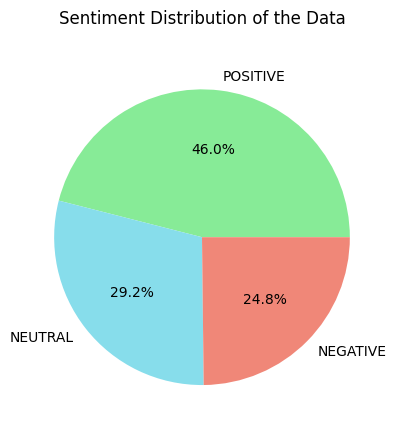

In [13]:
# Plotting sentiment distribution for whole dataset.
pos = 0
neu = 0
neg = 0

for i in domain_range:
    pos += dfs[i]["Label"].value_counts()["POSITIVE"]
    neu += dfs[i]["Label"].value_counts()["NEUTRAL"]
    neg += dfs[i]["Label"].value_counts()["NEGATIVE"]

labels = ["POSITIVE", "NEUTRAL", "NEGATIVE"]
sizes = [pos, neu, neg]
colors = [(0.529, 0.922, 0.592), (0.529, 0.867, 0.922), (0.941, 0.529, 0.471)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', 
       colors=colors)
ax.set_title("Sentiment Distribution of the Data\n")
plt.savefig("./plots/data_sentiment.png")
plt.show()

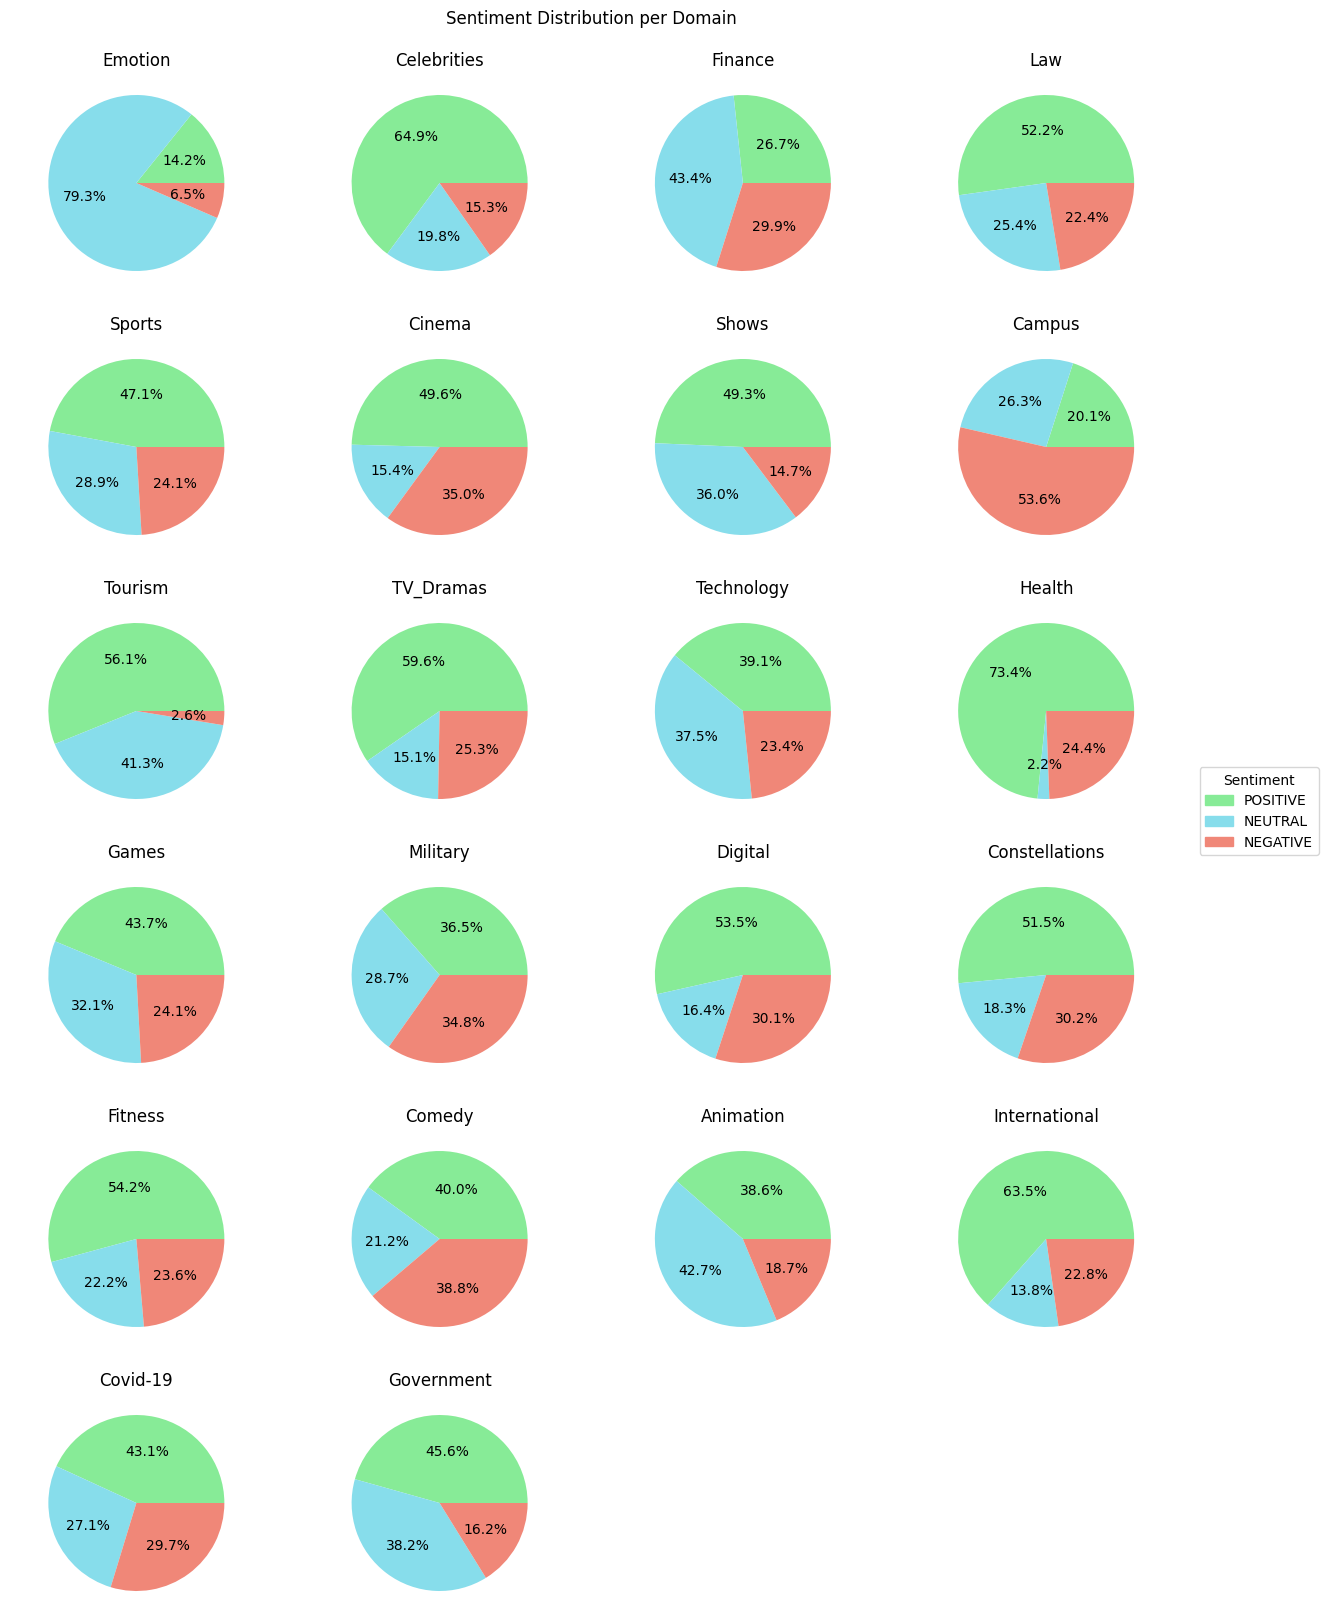

In [14]:
# Plotting sentiment distribution for each domain.
fig = plt.figure(figsize=(15, 20))
plt.title("Sentiment Distribution per Domain\n\n")
plt.axis("off")
for i in domain_range:
    pos = dfs[i]["Label"].value_counts()["POSITIVE"]
    neu = dfs[i]["Label"].value_counts()["NEUTRAL"]
    neg = dfs[i]["Label"].value_counts()["NEGATIVE"]
    sizes = [pos, neu, neg]
    plt.subplot(6, 4, i+1, title="\n"+domains[i])
    plt.pie(sizes, autopct="%1.1f%%",
            colors=colors)

lbl_to_clr = {lbl: clr for lbl, clr in zip(labels, colors)}
handles = [plt.Rectangle((0, 0), 0, 0, color=lbl_to_clr[lbl], label=lbl) for lbl in lbl_to_clr]
fig.legend(handles=handles, loc="center right", title="Sentiment")
plt.savefig("./plots/domain_sentiment.png")
plt.show()

With no null values, labels in order, and somments as strings, data can be sampled.

10% of the data will be sampled, as it was specified in the research methodology.

In [15]:
# Sampling 10% of each dataframe.
# Concatenating into new dataframe.
df_main = pd.DataFrame()

for i in domain_range:
    sampled_df = dfs[i].sample(frac=0.1, random_state=25)
    df_main = pd.concat([df_main, sampled_df])

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20633 entries, 9227 to 778
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  20633 non-null  object
 1   Label    20633 non-null  object
dtypes: object(2)
memory usage: 483.6+ KB


In [16]:
# Checking main_df's sentiment distribution.
main_values = df_main["Label"].value_counts()
print(main_values)

Label
POSITIVE    9480
NEUTRAL     6015
NEGATIVE    5138
Name: count, dtype: int64


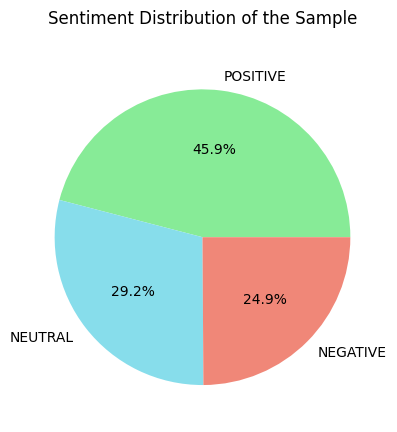

In [17]:
# Plotting sample's sentiment distribution.
fig, ax = plt.subplots()
ax.pie(main_values.values, labels=main_values.index, autopct='%1.1f%%', 
       colors=colors)
ax.set_title("Sentiment Distribution of the Sample\n")
plt.savefig("./plots/sample_sentiment.png")
plt.show()

In [18]:
# Creating separate sample for testing (1% of all data).
test_df = pd.DataFrame()

for i in domain_range:
    sampled_df = dfs[i].sample(frac=0.01, random_state=1)
    test_df = pd.concat([test_df, sampled_df])

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2063 entries, 7030 to 1606
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  2063 non-null   object
 1   Label    2063 non-null   object
dtypes: object(2)
memory usage: 48.4+ KB


In [19]:
# Checking test sentiment distribution.
test_values = test_df["Label"].value_counts()
print(test_values)

Label
POSITIVE    950
NEUTRAL     591
NEGATIVE    522
Name: count, dtype: int64


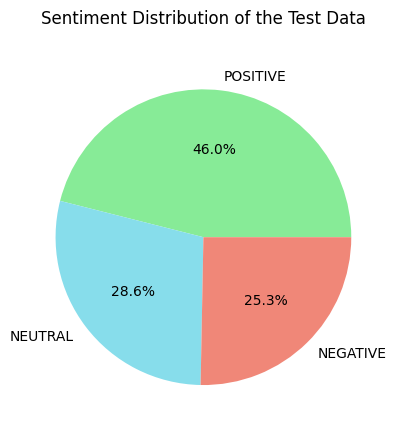

In [20]:
# Plotting test sentiment distribution.
fig, ax = plt.subplots()
ax.pie(test_values.values, labels=test_values.index, autopct='%1.1f%%', 
       colors=colors)
ax.set_title("Sentiment Distribution of the Test Data\n")
plt.savefig("./plots/test_sentiment.png")
plt.show()

The polarity distributions of the sample and the test data have very little difference

### 1.4 Getting Data Ready for SpaCy

In [21]:
# Creating tuple columns for later conversion into .spacy format.
df_main["Tuple"] = df_main.apply(lambda row: (row['Comment'], row['Label']), axis=1)

# Checking df_main.
df_main.head()

,Comment,Label,Tuple
9227,尽量还是去大医院吧，会比较正规,NEUTRAL,"(尽量还是去大医院吧，会比较正规, NEUTRAL)"
10916,那就算了吧,NEUTRAL,"(那就算了吧, NEUTRAL)"
5046,我觉得很多本身没谈过恋爱或者还没直面社会的女生可能根本就不明白婚姻意味着什么，所以当她们在社...,NEUTRAL,(我觉得很多本身没谈过恋爱或者还没直面社会的女生可能根本就不明白婚姻意味着什么，所以当她们在...
10679,自我奋斗,NEUTRAL,"(自我奋斗, NEUTRAL)"
8128,我真的是万万没想到,NEUTRAL,"(我真的是万万没想到, NEUTRAL)"


In [22]:
# Splitting main_df into train and validation.
train_df, valid_df = train_test_split(df_main, test_size=0.2, random_state=25)

print("train_df \n")
print(train_df.info())
print("\n" + "-"*40 + "\n")
print("valid_df \n")
print(str(valid_df.info()) + "\n")

train_df 

<class 'pandas.core.frame.DataFrame'>
Index: 16506 entries, 5975 to 5176
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  16506 non-null  object
 1   Label    16506 non-null  object
 2   Tuple    16506 non-null  object
dtypes: object(3)
memory usage: 515.8+ KB
None

----------------------------------------

valid_df 

<class 'pandas.core.frame.DataFrame'>
Index: 4127 entries, 5803 to 2495
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  4127 non-null   object
 1   Label    4127 non-null   object
 2   Tuple    4127 non-null   object
dtypes: object(3)
memory usage: 129.0+ KB
None



In [23]:
# storing tuple columns as Pandas series

train_data = train_df["Tuple"]
valid_data = valid_df["Tuple"]

print(train_data.head())
print("\n" + "-"*40 + "\n")
print(valid_data.head())

5975                  (每天演好一个情绪稳定的成年人?  , NEUTRAL)
6530                          ([鲜花][鲜花], POSITIVE)
10822                         (我可是铁粉[哇], POSITIVE)
6589                           (哈哈哈哈哈哈哈, POSITIVE)
7407     ([偷笑]他当时的表情好丰富，走路的姿势也与众不同，注定走红, POSITIVE)
Name: Tuple, dtype: object

----------------------------------------

5803                                  (真香啊[憧憬], POSITIVE)
7037                    (炒股赔钱心痛，那我们炒房赔大几十的也心疼哇, NEGATIVE)
7552    (兔叽感觉好柔弱。让人很有保护欲。[doge]尽管与我无关。今天已经给我一个女性朋友推荐1s...
9945                                     ([话筒], POSITIVE)
9638                                    (啊泽太棒了, POSITIVE)
Name: Tuple, dtype: object


### 1.5 Data Preprocessing

The comments from the tuples need to go through the processing pipeline and get converted into SpaCy's Doc objects.

The function below does the conversion and assigns values (1 or 0 depending on the label) to the Docs' cats property.

Doc objects represent the preprocessed data with all the necessary metadata (vectors, POS tags, dependencies).

In [24]:
# Creating function to transform data into Doc objects.
def make_docs(data):
    docs = []
    for doc, label in nlp.pipe(data, as_tuples=True):   # iterating through data and making Doc objects
        
        if label=="POSITIVE":
            doc.cats["POSITIVE"] = 1   # assigning 1 to positive for .cats property of positive Doc objects
            doc.cats["NEGATIVE"] = 0
            doc.cats["NEUTRAL"] = 0
        
        elif label=="NEGATIVE":
            doc.cats["POSITIVE"] = 0
            doc.cats["NEGATIVE"] = 1   # assigning 1 to negative for .cats property of negative Doc objects
            doc.cats["NEUTRAL"] = 0
        
        else:
            doc.cats["POSITIVE"] = 0
            doc.cats["NEGATIVE"] = 0
            doc.cats["NEUTRAL"] = 1    # assigning 1 to neutral for .cats property of neutral Doc objects
        
        docs.append(doc)
    
    return docs

Before using SpaCy's Chinese pipeline, it needs to be downloaded in the Command Line Interface (CLI) of the operating system.

The command for downloading the pipeline is:

`python -m spacy download zh_core_web_lg`

In [25]:
# Loading spacy's Chinese pipeline and checking pipeline components.
nlp = spacy.load("zh_core_web_lg")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'ner']

In [26]:
# ner and attribute_ruler are unnecessary for this project.
# Removing ner and attribute_ruler components.
nlp.remove_pipe("ner")
nlp.remove_pipe("attribute_ruler")
nlp.pipe_names

['tok2vec', 'tagger', 'parser']

In [27]:
# Creating spacy docs for train, valid and test tuples.
train_docs = make_docs(train_data) 
doc_bin = DocBin(docs=train_docs)             # binarizing train_docs
doc_bin.to_disk("./spacy_data/train.spacy")   # saving binary train_docs

valid_docs = make_docs(valid_data)
doc_bin = DocBin(docs=valid_docs)             # binarizing valid_docs
doc_bin.to_disk("./spacy_data/valid.spacy")   # saving binary valid_docs

In [28]:
# Checking .cats property of Docs.
print(train_data.iloc[0])
print(train_docs[0].cats)
print("\n")
print(valid_data.iloc[0])
print(valid_docs[0].cats)

('每天演好一个情绪稳定的成年人?  ', 'NEUTRAL')
{'POSITIVE': 0, 'NEGATIVE': 0, 'NEUTRAL': 1}


('真香啊[憧憬]', 'POSITIVE')
{'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 0}


## 2. Model Training

The training happens in the CLI.

This process involves:

1. Downloading an auto-generated partial configuration `base_config.cfg` file for the model training from SpaCy's __[training models webpage](https://spacy.io/usage/training#quickstart)__.
    
- The parameters for the base_config.cfg file are:
        
    - Language: Chinese
    - Components: textcat
    - Text Classification: exclusive categories
    - Hardware: CPU
    - Optimize for: accuracy

- After downloading, the paths to the training and validation datasets must be specified. In this research project they are given like this:

    `[paths]`

    `train = "spacy_data/train.spacy"`
    
    `dev = 'spacy_data/valid.spacy'`

- The width parameter of the CNN model should be changed (after many different combinations of parameters, this one outputs the best model):

    `[components.tok2vec.model.encode]`
    
    `@architectures = "spacy.MaxoutWindowEncoder.v2"`
    
    `width =` __256 --> 128__
    
    `depth = 8`
    
    `window_size = 1`
    
    `maxout_pieces = 3`


2. Creating the full config file by running `python -m spacy init fill-config ./base_config.cfg ./cinfig.cfg` in the CLI.

- The arguments for the command above are:
    - (`./base_config.cfg`) The path to the base_config.cfg file downloaded in step 1.
    - (`./cinfig.cfg`) The path to the full config.cfg file to be created.

3. Starting the training process by running `python -m spacy train config.cfg --output ./output` in the CLI.

- The arguments for the command above are:
    - (`config.cfg`) The path to the full config.cfg file created in step 2.
    - (`--output ./output`)The path to the output directory.

4. After the training process has finished, two models can be found in the output folder: model-best and model-last.

## 3. Model Evaluation

### 3.1 Getting Predictions

In [29]:
# Loading best model.
nlp = spacy.load("output/model-best")
nlp.pipe_names

['tok2vec', 'textcat']

In [30]:
# Getting prediction for each comment by passing it through model.
test_df["Prediction_textcat"] = test_df["Comment"].apply(lambda x: 
                                                 max(nlp(x).cats.items(), 
                                                     key=operator.itemgetter(1))[0])

test_df.head()

,Comment,Label,Prediction_textcat
7030,好恐怖，[跪了][跪了]造孽…早点离吧，女生越来不想结婚生娃是有理由的,NEUTRAL,NEGATIVE
2095,爽文,NEUTRAL,NEUTRAL
7168,持一下，加加人气,NEUTRAL,NEGATIVE
7969,哈哈 你会看啊[允悲],NEUTRAL,NEUTRAL
6320,这里的人就是太能忍了,NEUTRAL,POSITIVE


Some inconsistencies can already be observed.

### 3.2 Confusion Matrix and F1-Score

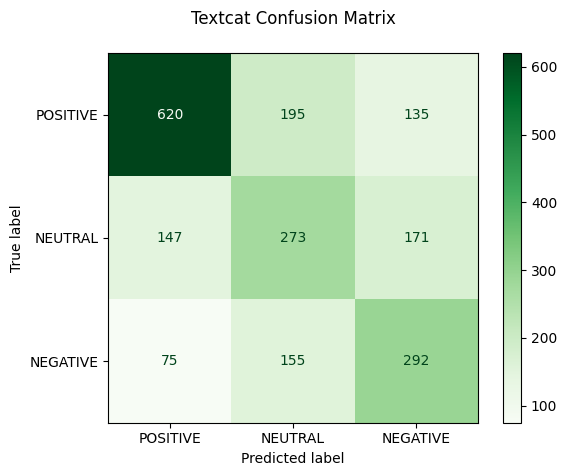

In [31]:
# Displaying confusion matrix.
cm = confusion_matrix(test_df["Label"], test_df["Prediction_textcat"], 
                labels=labels)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap="Greens")
plt.title("Textcat Confusion Matrix\n")
plt.savefig("./plots/textcat_cm.png")
plt.show()

In [32]:
# Displaying precision, recall, and F1-Score for each category.
p = precision_score(test_df["Label"], test_df["Prediction_textcat"],
                    average=None,
                    labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

r = recall_score(test_df["Label"], test_df["Prediction_textcat"],
                 average=None,
                 labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

f = f1_score(test_df["Label"], test_df["Prediction_textcat"],
             average=None,
             labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

print("Precision: " + str(p))
print("Recall: " + str(r))
print("F1-score: " + str(f))

Precision: [0.73634204 0.43820225 0.48829431]
Recall: [0.65263158 0.46192893 0.55938697]
F1-score: [0.69196429 0.44975288 0.52142857]


It seems that the model has most problems with the NEUTRAL class.

In [33]:
# Displaying macro average F1-Score.
f1_score(test_df["Label"], test_df["Prediction_textcat"], average="macro")

0.5543819133913862

The average F1-Score across all three classes is not ideal. There might be several reasons to that. They will be covered in the result interpretation part of the dissertation.

## 4. Translation Sentiment

### 4.1 Translating Comments

In [34]:
# Creating GoogleTranslator object.
translator = GoogleTranslator(source='zh-CN', target='en')

In [35]:
# Creating column for translated comments.
test_df["Translation"] = test_df["Comment"].apply(lambda x: str(translator.translate(x)))
test_df.head()

,Comment,Label,Prediction_textcat,Translation
7030,好恐怖，[跪了][跪了]造孽…早点离吧，女生越来不想结婚生娃是有理由的,NEUTRAL,NEGATIVE,"It’s so scary, [kneel down] [kneel down] What ..."
2095,爽文,NEUTRAL,NEUTRAL,cool article
7168,持一下，加加人气,NEUTRAL,NEGATIVE,Keep it up and increase your popularity
7969,哈哈 你会看啊[允悲],NEUTRAL,NEUTRAL,"Haha, you can see it [Yunbei]"
6320,这里的人就是太能忍了,NEUTRAL,POSITIVE,The people here are just too tolerant.


### 4.2 Applying TextBlob and Getting Predictions

Before using SpaCy's English pipeline, it needs to be downloaded in CLI.

The command for downloading the pipeline is:

`python -m spacy download en_core_web_sm`

In [36]:
# Loading spacy's English pipeline and checking pipeline components.
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [37]:
# ner and attribute_ruler are unnecessary for this project.
# Removing ner and attribute_ruler components.
nlp.remove_pipe("ner")
nlp.remove_pipe("attribute_ruler")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'lemmatizer']

Before using spacytextblob, the following installations are required in the CLI:

`pip install -U textblob`

`python -m textblob.download_corpora`

`pip install spacytextblob`

In [38]:
# Importing spacytextblob.
from spacytextblob.spacytextblob import SpacyTextBlob

In [39]:
# Adding spasytextblob component to the pipeline.
nlp.add_pipe("spacytextblob")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'lemmatizer', 'spacytextblob']

In [40]:
# Getting polarity score for each translated comment.
test_df["Polarity_Score"] = test_df["Translation"].apply(lambda x: nlp(x)._.blob.polarity)
test_df.head()

/Users/vova_nikon/Documents/Dissertation/thesis_code/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,Comment,Label,Prediction_textcat,Translation,Polarity_Score
7030,好恐怖，[跪了][跪了]造孽…早点离吧，女生越来不想结婚生娃是有理由的,NEUTRAL,NEGATIVE,"It’s so scary, [kneel down] [kneel down] What ...",-0.112222
2095,爽文,NEUTRAL,NEUTRAL,cool article,0.350000
7168,持一下，加加人气,NEUTRAL,NEGATIVE,Keep it up and increase your popularity,0.000000
7969,哈哈 你会看啊[允悲],NEUTRAL,NEUTRAL,"Haha, you can see it [Yunbei]",0.200000
6320,这里的人就是太能忍了,NEUTRAL,POSITIVE,The people here are just too tolerant.,0.000000


In [41]:
# Assigning labels for Polarity_Score.
test_df["Prediction_textblob"] = test_df["Polarity_Score"].apply(lambda x: "POSITIVE" if x>0
                                                                else ("NEGATIVE" if x<0
                                                                     else "NEUTRAL"))
test_df.head()

,Comment,Label,Prediction_textcat,Translation,Polarity_Score,Prediction_textblob
7030,好恐怖，[跪了][跪了]造孽…早点离吧，女生越来不想结婚生娃是有理由的,NEUTRAL,NEGATIVE,"It’s so scary, [kneel down] [kneel down] What ...",-0.112222,NEGATIVE
2095,爽文,NEUTRAL,NEUTRAL,cool article,0.350000,POSITIVE
7168,持一下，加加人气,NEUTRAL,NEGATIVE,Keep it up and increase your popularity,0.000000,NEUTRAL
7969,哈哈 你会看啊[允悲],NEUTRAL,NEUTRAL,"Haha, you can see it [Yunbei]",0.200000,POSITIVE
6320,这里的人就是太能忍了,NEUTRAL,POSITIVE,The people here are just too tolerant.,0.000000,NEUTRAL


### 4.3 Confusion Matrix and F1-Score for spacytextblob and Original Labels

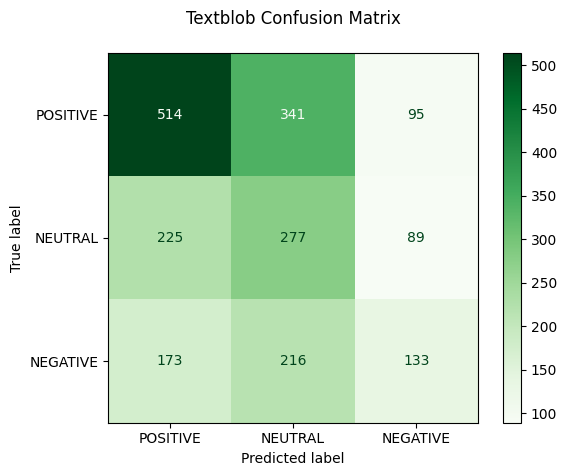

In [42]:
# Displaying confusion matrix.
cm = confusion_matrix(test_df["Label"], test_df["Prediction_textblob"], 
                labels=labels)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap="Greens")
plt.title("Textblob Confusion Matrix\n")
plt.savefig("./plots/textblob_cm.png")
plt.show()

In [43]:
# Displaying precision, recall, and F1-Score for each category.
p = precision_score(test_df["Label"], test_df["Prediction_textblob"],
                    average=None,
                    labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

r = recall_score(test_df["Label"], test_df["Prediction_textblob"],
                 average=None,
                 labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

f = f1_score(test_df["Label"], test_df["Prediction_textblob"],
             average=None,
             labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

print("Precision: " + str(p))
print("Recall: " + str(r))
print("F1-score: " + str(f))

Precision: [0.56359649 0.33213429 0.41955836]
Recall: [0.54105263 0.46869712 0.25478927]
F1-score: [0.55209452 0.38877193 0.3170441 ]


It seems that the model has most problems with the NEGATIVE class.

In [44]:
# Displaying macro average F1-Score.
f1_score(test_df["Label"], test_df["Prediction_textblob"], average="macro")

0.4193035173210283

Textblob is struggling to accurately predict the sentiment of the translated comments.

### 4.4 Confusion Matrix and F1-Score for spacytextblob and textcat

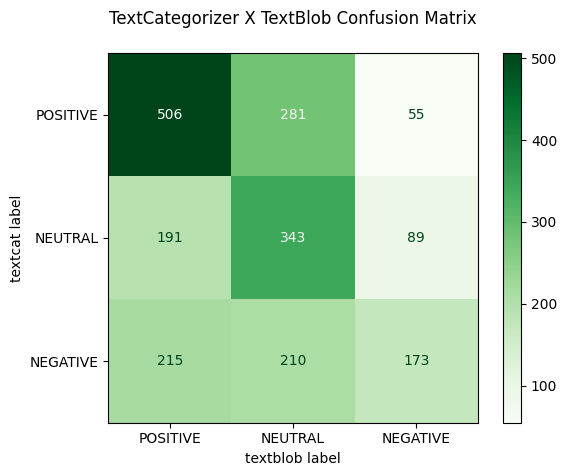

In [45]:
# Displaying confusion matrix.
cm = confusion_matrix(test_df["Prediction_textcat"], test_df["Prediction_textblob"], 
                labels=labels)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap="Greens")
plt.title("TextCategorizer X TextBlob Confusion Matrix\n")
plt.xlabel("textblob label")
plt.ylabel("textcat label")
plt.savefig("./plots/textcat_textblob_cm.png")
plt.show()

In [46]:
# Displaying precision, recall, and F1-Score for each category.
p = precision_score(test_df["Prediction_textcat"], test_df["Prediction_textblob"],
                    average=None,
                    labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

r = recall_score(test_df["Prediction_textcat"], test_df["Prediction_textblob"],
                 average=None,
                 labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

f = f1_score(test_df["Prediction_textcat"], test_df["Prediction_textblob"],
             average=None,
             labels=["POSITIVE", "NEUTRAL", "NEGATIVE"])

print("Precision: " + str(p))
print("Recall: " + str(r))
print("F1-score: " + str(f))

Precision: [0.55482456 0.41127098 0.54574132]
Recall: [0.60095012 0.5505618  0.28929766]
F1-score: [0.57696693 0.47083047 0.37814208]


In [47]:
# Displaying macro average F1-Score.
f1_score(test_df["Prediction_textcat"], test_df["Prediction_textblob"], average="macro")

0.47531316093459086

The F1-Score has improved compared to the original labels, although it is still quite poor.